# Heart Disease

Carlos<br>
Jem Pool<br>
Esneider<br>

<center>When tienes exposición de IA</center>
<img src="heart-attack.jpg" width="300px"> 

# Importando las librerías

In [1121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense

# Cargando los datos

In [283]:
trainx = pd.read_csv("./heart.csv")

Se presenta un resumen de la información contenida en el dataset la cual aporta cierto conocimiento sobre los datos a trabajar

In [284]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [285]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Significado de los atributos
<ul>
    <li>
        <h3>Age:</h3>
        Edad de la persona
    </li>
    <li>
        <h3>Sex:</h3>
        Sexo de la persona (1 para hombre, 0 para mujer)
    </li>
    <li>
        <h3>cp:</h3>
        Chest pain experienced - Experencia de dolor en el pecho
        0: angino tipico <br>
        1: angina atipico<br>
        2: Dolor no anginal<br>
        3: asymptomatico       
    </li>
        <li>
        <h3>trestbps:</h3>
        La presión arterial en reposo de la persona
    </li>
        <li>
        <h3>chol:</h3>
        Colesterol de la persona (mg/dl)
    </li>
        <li>
        <h3>fbs:</h3>
        El azúcar en sangre de la persona en ayunas (> 120 mg/dl, 1: true; 0: false) 
    </li>
        <li>
        <h3>restecg:</h3>
        resting electrocardiographic results <br>
        0: normal<br>
        1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
        2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    </li>
        <li>
        <h3>thalach:</h3>
        El registro de la frecuencia cardíaca máxima de la persona
    </li>
        <li>
        <h3>Exang:</h3>
         Angina inducida por ejercicio (1: si; 0: no)
    </li>
    <li>
        <h3>oldpeak:</h3>
         Depresión del ST inducida por el ejercicio relativo al descanso
    </li>
    <li>
        <h3>slope:</h3>
         la pendiente del segmento pico del ejercicio ST<br>
         0: pendiente ascendente<br>
         1: plano<br>
         2: pendiente descendente<br>
    </li>
    <li>
        <h3>ca:</h3>
         El número de vasos principales (0-3)
    </li>
    <li>
        <h3>thal:</h3>
         Trastorno sanguíneo conocido como talasemia<br>
         3: normal<br>
         6: defecto fijo<br>
         7: efecto reversible
    </li>
       <li>
        <h3>Desease:</h3>
         0: No Enfermo<br>
         1: Enfermo
    </li> 
    
</ul>

<h3>Datos completos</h3>

In [858]:
print("NaNs Existentes:")
print(trainx.isna().any().any())
print("------------------")
print("Nulls Existentes:")
print(trainx.isnull().any().any())

NaNs Existentes:
False
------------------
Nulls Existentes:
False


# Gráficas de los datos

<h2>Histogramas</h2>

Variables:

<ul>
    <li>
    Age
    </li>
    <li>
    Trestbps
    </li>
    <li>
    chol
    </li>
    <li>
    Thalach
    </li>
    <li>
    Oldpeak
    </li>
</ul>

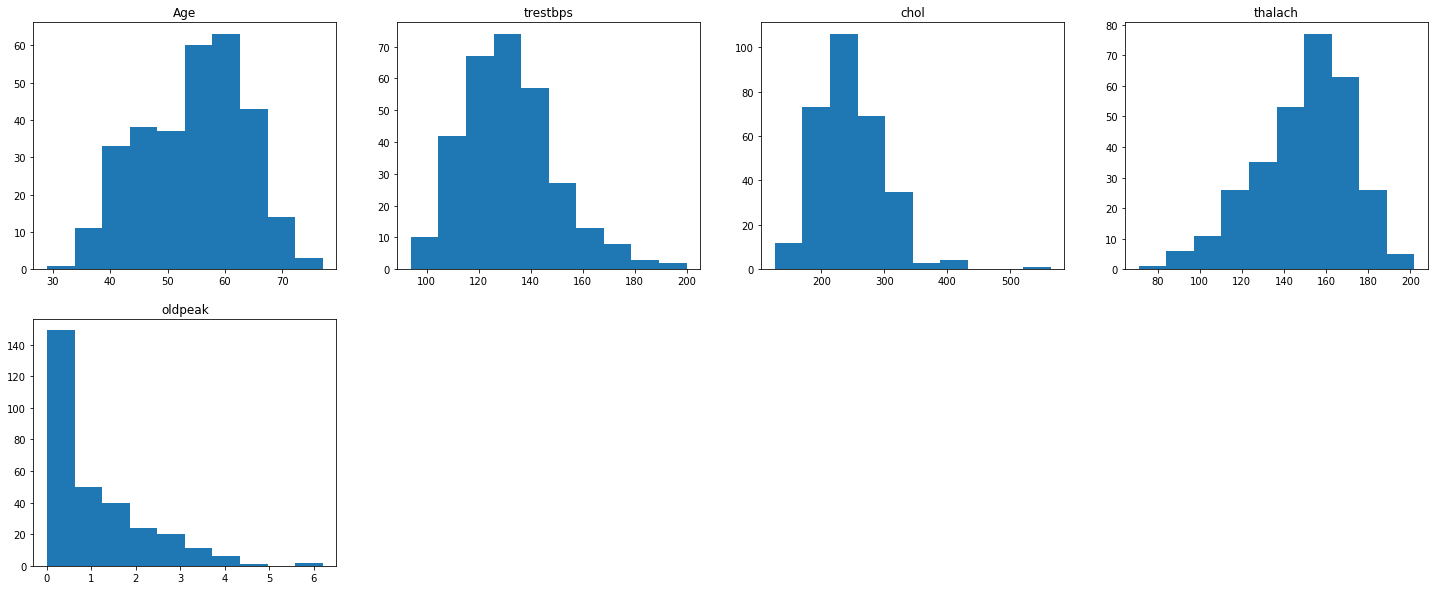

In [289]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])

plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('')


plt.show()

<h2>Pasteles</h2>

Variables:

<ul>
    <li>
    Sex
    </li>
    <li>
    Fbs
    </li>
    <li>
    Restecg
    </li>
    <li>
    Exang
    </li>
    <li>
    Thal
    </li>
    <li>
    Cp
    </li>
    <li>
    Slope
    </li>
    <li>
    Ca
    </li>
    <li>
    Target
    </li>
</ul>

Text(0.5,1,'Target')

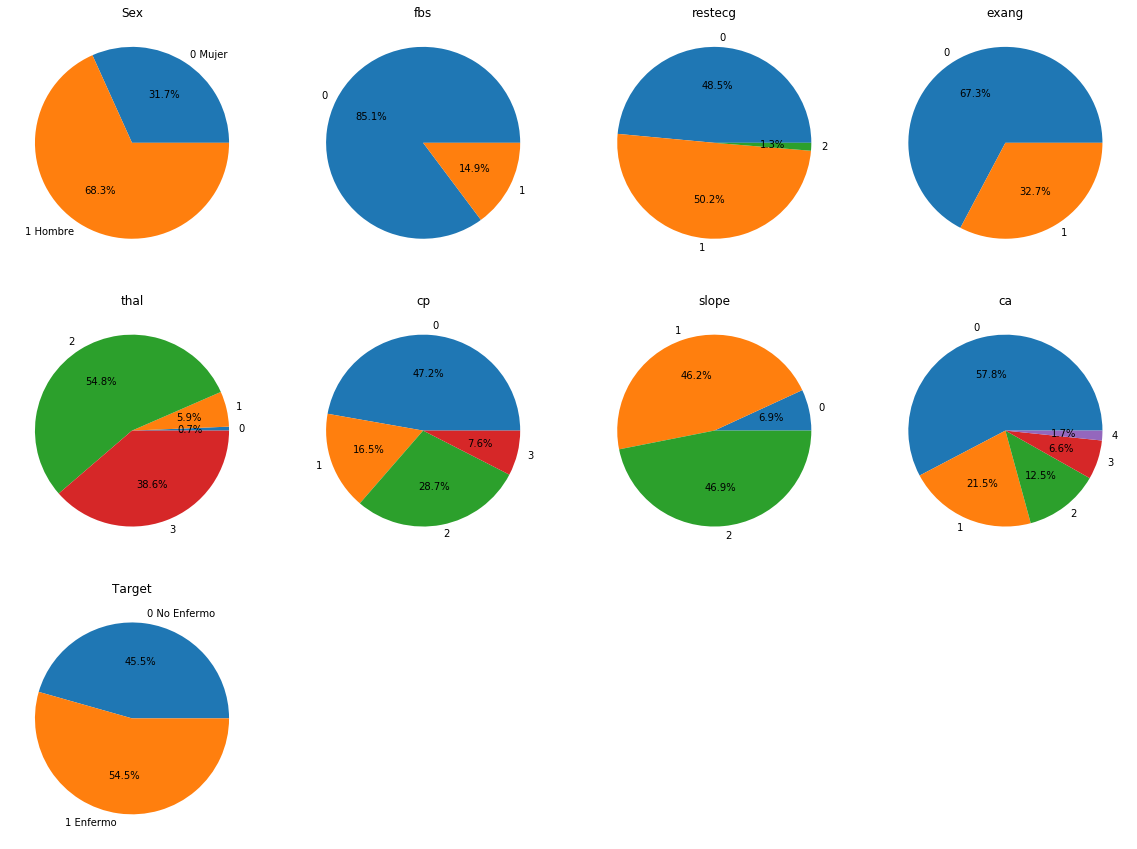

In [290]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0 Mujer", "1 Hombre"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["0","1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0 No Enfermo", "1 Enfermo"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Target')



# División del conjunto de datos
<h2>80% para entrenamiento y 20% para pruebas</h2>


In [324]:
# atributos y target
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Diviendo datos para entrenar y probar
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((242, 13), (242,))
((61, 13), (61,))


Número de tuplas para entrenamiento : <b>242</b> <br>
Número de tuplas para pruebas: <b>61</b>

In [890]:
#Funcion auxiliar para la generacion de la grafica de la matriz de confusion 
def plot_confusion_matrix(cm,
                      

    target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('OrRd')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Árbol de decisión

El árbol de decisión se basa en encontrar una medida de selección de los atributos, es una heurística para seleccionar el criterio de división que divide los datos de la mejor manera posible. Este proceso genera un rango para cada atributo al explicar el conjunto de datos dado. El atributo de mejor puntaje se seleccionará como un atributo de división.

In [1041]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 4)
# model1 = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 4)

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
# print(confusion_matrix(model1.predict(testX), testY))

# y_pred = model1.predict(testX)
# print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Train: 0.9214876033057852
Test: 0.7704918032786885


Se puede apreciar que los resultados para el conjunto de entrenamiento y de prueba no son muy cercanos, esto se debe a que el modelo de clasificación del árbol de decisión es un modelo poco estable y que en ciertos casos no garantiza resultados del todo confiables. Sin embargo en base a la configuración establecida anteriormente se llega a un rendimiento aceptable por parte del conjunto de prueba, entre un 75% y 78%.

<h2>Matriz de confusión</h2>

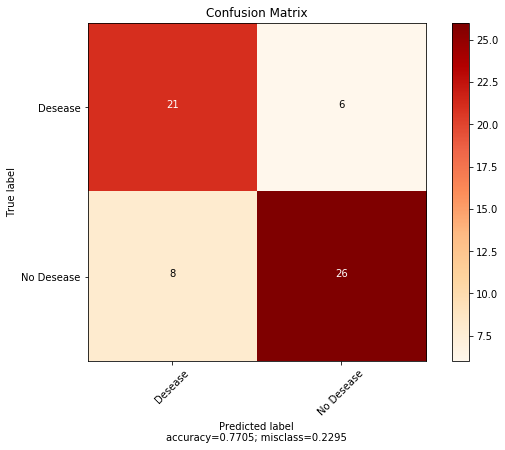

In [1042]:
plot_confusion_matrix(cm = confusion_matrix(model1.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['Desease', 'No Desease'],
                      title        = "Confusion Matrix")

# Gráfica de Importancias y Árbol de decisión


(array([0.12423818, 0.34152337, 0.01190243, 0.0294822 , 0.06173172,
       0.03516268, 0.06426662, 0.        , 0.02041428, 0.10925422,
       0.0598987 , 0.00947095, 0.13265462]), 0.8910891089108911)


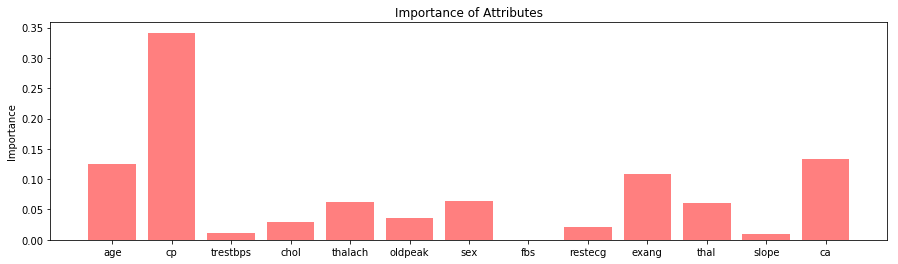

In [1043]:
importances = model1.feature_importances_
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

En este gráfico se puede apreciar la importancia que tiene cada atributo sobre el conjunto de datos. Durante de construcción del árbol se realizaron bastantes ejecuciones para determinar cuál era el atributo que representa al nodo padre, fue claro que el atributo que más veces aparece con una importancia mayor a la del resto era <i><b>Chest Pain</b></i>.

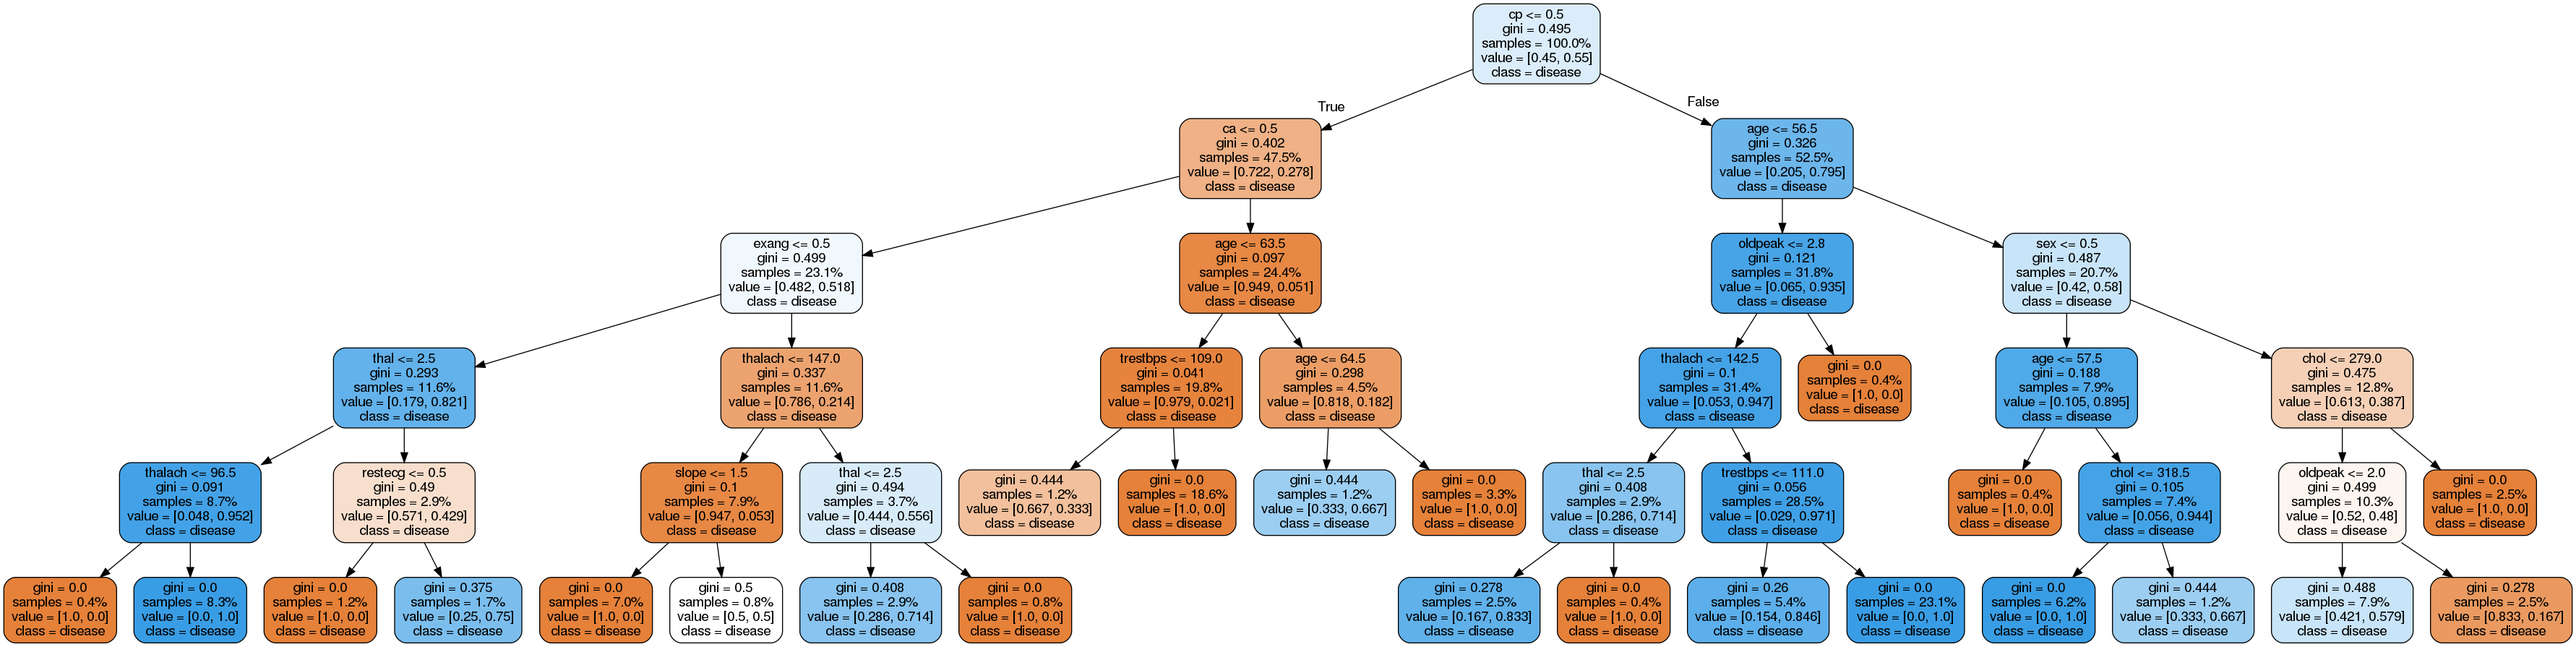

In [1062]:
y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h2>Interpretación</h2>

Es claro que se puede representar los resultados de una manera muy sencilla y fácil de interpretar, debido a que se puede generar automáticamente una gráfica que describa el proceso de selección de los atributos que influyen más en una prediccion. Esto hace que el modelo de arboles de decisión sea un modelo muy práctico a la hora de entender cómo se ejecutan las condiciones y se generan resultados.

Explicacion de gini y la descripción de la info de los nodos..........................

# Naive Bayes

El modelo de bayes ingenuo presenta una estrategia basada en el teorema de bayes

In [1060]:
model2 = gnb.fit(trainX, trainY)


#Print the score on the train data
print("Train: " + str(model2.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model2.score(testX, testY)))

# y_pred2 = model2.predict(testX)
# print(y_pred2)
# print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
# print(metrics.classification_report(testY, y_pred2))
# from sklearn.metrics import confusion_matrix



Train: 0.8388429752066116
Test: 0.7868852459016393


<h2>Matriz de confusión</h2>

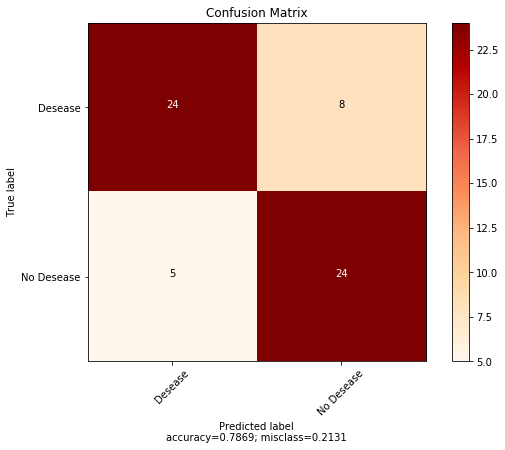

In [897]:
plot_confusion_matrix(cm = confusion_matrix(model2.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['Desease', 'No Desease'],
                      title        = "Confusion Matrix")

<h2>Interpretación</h2>

Se puede apreciar que la clasificacion con Naive Bayes es directa y no requiere ajustar parametros para obtener mejores resultados.

# Red Neuronal

# Cross Validation (?)

In [1064]:
# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='sgd', alpha=1e-3, activation = 'relu', max_iter=2000,
                     hidden_layer_sizes = (5, 5, 5, 5, 5), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

Iteration 1, loss = 0.82337539
Iteration 2, loss = 0.82252560
Iteration 3, loss = 0.82110933
Iteration 4, loss = 0.81923849
Iteration 5, loss = 0.81706214
Iteration 6, loss = 0.81466141
Iteration 7, loss = 0.81198199
Iteration 8, loss = 0.80919407
Iteration 9, loss = 0.80629460
Iteration 10, loss = 0.80323475
Iteration 11, loss = 0.80016596
Iteration 12, loss = 0.79703213
Iteration 13, loss = 0.79397938
Iteration 14, loss = 0.79091943
Iteration 15, loss = 0.78794061
Iteration 16, loss = 0.78496366
Iteration 17, loss = 0.78221804
Iteration 18, loss = 0.77924755
Iteration 19, loss = 0.77663082
Iteration 20, loss = 0.77386305
Iteration 21, loss = 0.77110185
Iteration 22, loss = 0.76851340
Iteration 23, loss = 0.76593961
Iteration 24, loss = 0.76333299
Iteration 25, loss = 0.76085603
Iteration 26, loss = 0.75845177
Iteration 27, loss = 0.75599387
Iteration 28, loss = 0.75378735
Iteration 29, loss = 0.75154759
Iteration 30, loss = 0.74930813
Iteration 31, loss = 0.74728969
Iteration 32, los

Iteration 343, loss = 0.59937558
Iteration 344, loss = 0.59875525
Iteration 345, loss = 0.59816830
Iteration 346, loss = 0.59757263
Iteration 347, loss = 0.59700066
Iteration 348, loss = 0.59639071
Iteration 349, loss = 0.59577775
Iteration 350, loss = 0.59519368
Iteration 351, loss = 0.59458037
Iteration 352, loss = 0.59394671
Iteration 353, loss = 0.59335026
Iteration 354, loss = 0.59270803
Iteration 355, loss = 0.59209369
Iteration 356, loss = 0.59142547
Iteration 357, loss = 0.59080917
Iteration 358, loss = 0.59011938
Iteration 359, loss = 0.58944670
Iteration 360, loss = 0.58877129
Iteration 361, loss = 0.58810623
Iteration 362, loss = 0.58743649
Iteration 363, loss = 0.58675431
Iteration 364, loss = 0.58609787
Iteration 365, loss = 0.58542228
Iteration 366, loss = 0.58475497
Iteration 367, loss = 0.58409098
Iteration 368, loss = 0.58344837
Iteration 369, loss = 0.58277965
Iteration 370, loss = 0.58213839
Iteration 371, loss = 0.58148379
Iteration 372, loss = 0.58084719
Iteration 

Iteration 689, loss = 0.41939790
Iteration 690, loss = 0.41910840
Iteration 691, loss = 0.41875408
Iteration 692, loss = 0.41845231
Iteration 693, loss = 0.41814399
Iteration 694, loss = 0.41782370
Iteration 695, loss = 0.41755843
Iteration 696, loss = 0.41721825
Iteration 697, loss = 0.41691409
Iteration 698, loss = 0.41661916
Iteration 699, loss = 0.41632536
Iteration 700, loss = 0.41604312
Iteration 701, loss = 0.41572367
Iteration 702, loss = 0.41544596
Iteration 703, loss = 0.41511771
Iteration 704, loss = 0.41479716
Iteration 705, loss = 0.41446162
Iteration 706, loss = 0.41414111
Iteration 707, loss = 0.41380380
Iteration 708, loss = 0.41347934
Iteration 709, loss = 0.41312325
Iteration 710, loss = 0.41281952
Iteration 711, loss = 0.41248688
Iteration 712, loss = 0.41215839
Iteration 713, loss = 0.41181720
Iteration 714, loss = 0.41153285
Iteration 715, loss = 0.41124695
Iteration 716, loss = 0.41090409
Iteration 717, loss = 0.41057920
Iteration 718, loss = 0.41023219
Iteration 

Iteration 955, loss = 0.35545651
Iteration 956, loss = 0.35534803
Iteration 957, loss = 0.35522150
Iteration 958, loss = 0.35508029
Iteration 959, loss = 0.35496078
Iteration 960, loss = 0.35482433
Iteration 961, loss = 0.35474681
Iteration 962, loss = 0.35459991
Iteration 963, loss = 0.35449975
Iteration 964, loss = 0.35439311
Iteration 965, loss = 0.35422457
Iteration 966, loss = 0.35412810
Iteration 967, loss = 0.35403938
Iteration 968, loss = 0.35402956
Iteration 969, loss = 0.35382054
Iteration 970, loss = 0.35368787
Iteration 971, loss = 0.35355580
Iteration 972, loss = 0.35339334
Iteration 973, loss = 0.35326415
Iteration 974, loss = 0.35313377
Iteration 975, loss = 0.35301270
Iteration 976, loss = 0.35289460
Iteration 977, loss = 0.35279026
Iteration 978, loss = 0.35270085
Iteration 979, loss = 0.35269264
Iteration 980, loss = 0.35255844
Iteration 981, loss = 0.35241938
Iteration 982, loss = 0.35233732
Iteration 983, loss = 0.35225141
Iteration 984, loss = 0.35216582
Iteration 

La configuración del modelo con redes neuronales, muestra una muy buena exactitud entre el rendimiento del conjunto de entrenamiento y de pruebas, la configuración,que se plantea inicialmente consiste en 5 capas invisibles con 5 neuronas cada una haciendo uso de la función de activacion relu, y el gradiente descendiente estocástico como funcion de optimizacion de pesos

<h2>Matriz de confusión</h2>

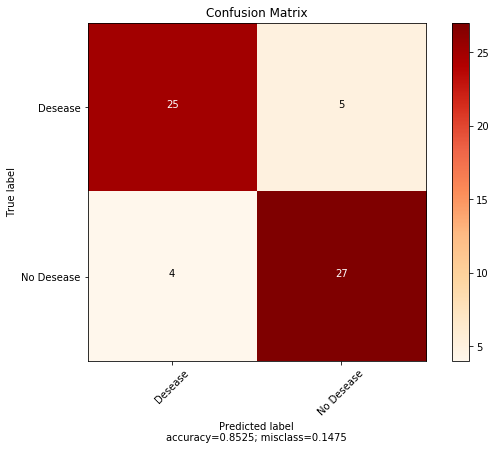

In [1046]:
plot_confusion_matrix(cm = confusion_matrix(model3.predict(testXX), testY), 
                      normalize    = False,
                      target_names = ['Desease', 'No Desease'],
                      title        = "Confusion Matrix")

<h2>Interpretación</h2>

La interpretacion de un modelo de redes neuronales es bastante complejo ya que dispone de muchos atributos que deben cambiarse y que mejoran y/o empeoran los resultados

In [1061]:
# Para mirar los pesos finales
print model3.coefs_

[array([[-1.68798975e-01,  2.87428997e-01, -5.62183132e-01,
         1.87502434e-02, -2.31331278e-01],
       [-4.77137206e-01, -2.01251910e-01,  1.50040109e-01,
         1.51653472e-01,  4.15181324e-01],
       [-2.22111721e-02,  1.43921169e-01, -3.48547270e-01,
         2.20295693e-01, -7.47735208e-01],
       [ 1.56192171e-01, -3.03380485e-02,  7.84138723e-02,
        -8.21714636e-02, -2.47312397e-01],
       [ 3.13016958e-01,  5.37857756e-01,  9.33488639e-03,
         2.97877307e-01,  4.10312101e-01],
       [ 4.37695402e-01, -5.94078034e-01, -5.41029885e-01,
        -3.44437418e-01,  2.48017313e-01],
       [-4.44047193e-01, -1.48328327e-01,  4.18665686e-01,
        -6.46107051e-01, -3.35900298e-04],
       [-1.24443680e-01,  2.45595793e-01,  3.84122690e-01,
        -5.27662264e-01,  4.43206957e-01],
       [ 5.06596998e-01,  3.01355289e-01, -4.14631171e-02,
         1.65553301e-01, -3.28965764e-01],
       [-7.54216632e-02,  4.99776790e-01, -3.32124861e-01,
        -4.81592944e-0

# ANOTHER NEURAL NETWORK WITH KERAS

In [1126]:
network = Sequential()
network.add(Dense(5, input_dim=13, activation='relu'))
network.add(Dense(5, activation='relu'))
network.add(Dense(5, activation='relu'))
network.add(Dense(5, activation='relu'))
network.add(Dense(5, activation='relu'))


# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
network.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])
# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


network.fit(trainXX, trainY, epochs=100)

scoreT = network.evaluate(testXX, testY)
scoreE = network.evaluate(trainXX, trainY)

print("Score del test")
print("%s: %.2f%%" % (network.metrics_names[1], scoreT[1]*100))
print("Score del entrenamiento")
print("%s: %.2f%%" % (network.metrics_names[1], scoreE[1]*100))

# predictions = network.predict_classes(testX)

Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 2.7623 - binary_accuracy: 0.4545
Epoch 2/100
242/242 [==============================] - 0s 99us/step - loss: 0.7885 - binary_accuracy: 0.4554
Epoch 3/100
242/242 [==============================] - 0s 160us/step - loss: 0.6854 - binary_accuracy: 0.4554
Epoch 4/100
242/242 [==============================] - 0s 185us/step - loss: 0.6847 - binary_accuracy: 0.4554
Epoch 5/100
242/242 [==============================] - 0s 157us/step - loss: 0.6836 - binary_accuracy: 0.4570
Epoch 6/100
242/242 [==============================] - 0s 162us/step - loss: 0.6825 - binary_accuracy: 0.4554
Epoch 7/100
242/242 [==============================] - 0s 203us/step - loss: 0.6810 - binary_accuracy: 0.4562
Epoch 8/100
242/242 [==============================] - 0s 166us/step - loss: 0.6798 - binary_accuracy: 0.4595
Epoch 9/100
242/242 [==============================] - 0s 181us/step - loss: 0.6788 - binary_accuracy: 0.4603
Epoch 10/100


242/242 [==============================] - 0s 156us/step - loss: 0.4772 - binary_accuracy: 0.4504
Epoch 75/100
242/242 [==============================] - 0s 130us/step - loss: 0.4785 - binary_accuracy: 0.4488
Epoch 76/100
242/242 [==============================] - 0s 153us/step - loss: 0.4754 - binary_accuracy: 0.4587
Epoch 77/100
242/242 [==============================] - 0s 88us/step - loss: 0.4812 - binary_accuracy: 0.4537
Epoch 78/100
242/242 [==============================] - 0s 90us/step - loss: 0.4740 - binary_accuracy: 0.4545
Epoch 79/100
242/242 [==============================] - 0s 73us/step - loss: 0.5329 - binary_accuracy: 0.4430
Epoch 80/100
242/242 [==============================] - 0s 91us/step - loss: 0.5248 - binary_accuracy: 0.4339
Epoch 81/100
242/242 [==============================] - 0s 68us/step - loss: 0.4829 - binary_accuracy: 0.4488
Epoch 82/100
242/242 [==============================] - 0s 96us/step - loss: 0.4817 - binary_accuracy: 0.4463
Epoch 83/100
242/242

In [1127]:
# network.summary()

In [1128]:
# for layer in network.layers:
#     h=layer.get_weights()
#     print (h)

# Comparación de los modelos 

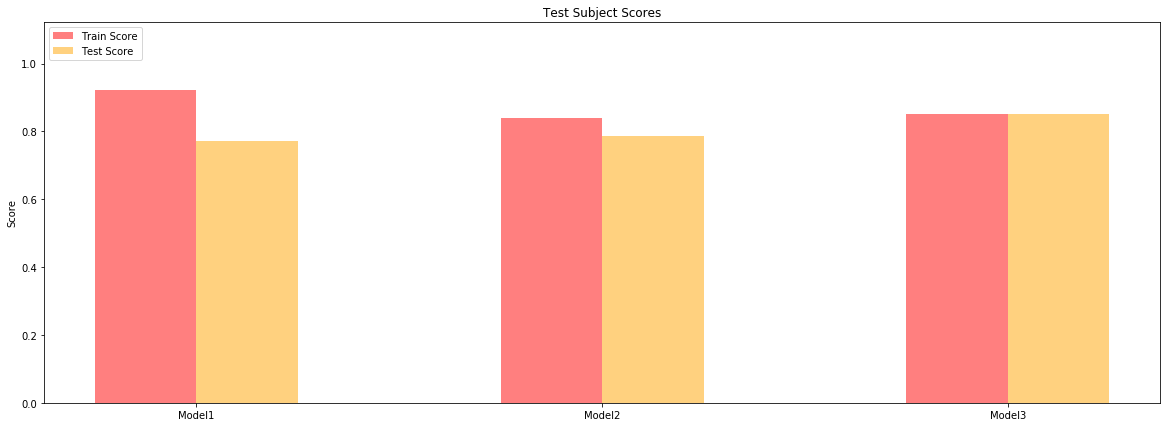

In [1120]:
raw_data = {'Modelo': ['Model1', 'Model2', 'Model3'],
        'Train Score': [model1.score(trainX, trainY), model2.score(trainX, trainY), model3.score(trainXX, trainY)],
        'Test Score': [model1.score(testX, testY), model2.score(testX, testY), model3.score(testXX, testY)]}

df = pd.DataFrame(raw_data, columns = ['Modelo', 'Train Score', 'Test Score'])
# Setting the positions and width for the bars
pos = list(range(len(df['Train Score']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,7))

# Create a bar with pre_score data,

plt.bar(pos, 
        df['Train Score'], 
        width, 
        alpha=0.5, 
        color='red', 
        label=df['Modelo'][0]) 

plt.bar([p + width for p in pos], 
        df['Test Score'],
        width, 
        alpha=0.5, 
        color='orange', 
        label=df['Modelo'][1]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Modelo'])

# Setting the x-axis and y-axis limits
plt.ylim([0, max(df['Train Score'] + 0.2)] )

# Adding the legend and showing the plot
plt.legend(['Train Score', 'Test Score'], loc='upper left')
# plt.grid()
plt.show()

# Conclusiones

:)